#  <span style="color:SeaGreen"> Part 3 :</span><span style="color:DarkSlateBlue"> Football Transfer Market Data ML Modelling </span>


### This notebook focuses on implementing Machine Learning Algorithms for evaluating football player transfer market vlaues. Various train:test splits, evaluation, validation and hyperparameter tuning techniques are leveraged in optimising each model

#### <span style="color:Teal"> Importing Dependencies</span>

In [154]:
# Visualization Libraries
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

#Preprocessing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from pycaret.regression import *
import lightgbm
from catboost import CatBoostRegressor


# Evaluation Metrics
from sklearn import metrics
from yellowbrick.features import Rank2D, FeatureImportances
from yellowbrick.regressor import PredictionError, ResidualsPlot

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

# <span style="color:Tomato"> Original Code from First Iteration</span>

#### <span style="color:Teal">Loading Data</span>

In [155]:
# NO SCALING

# One-hot label encoded but no scaling or feature selection
df8_dummies_all = pd.read_csv('df8_dummies_all.csv')

# Only numerical features, no scaling or feature selection
numerical_features_df = pd.read_csv('numerical_features_df.csv')


# # MINMAX SCALER

# # Only Numerical Features and MINMAX Scaling
# numerical_features_df_4_midmax_scaled = pd.read_csv('numerical_features_df_4_midmax_scaled.csv')

# # One-hot label encoded on select Categorical features(last_season, foot, position, sub_position, age_group) 
# # and MinMax Scaling NO Feature Selection
df8_dummies_essential_mm_scaled = pd.read_csv('df8_dummies_essential_mm_scaled.csv')

# # One-hot label encoded on ALL Categorical features and MinMAx Scaling, NO Feature Selection
df8_dummies_all_mm_scaled = pd.read_csv('df8_dummies_all_mm_scaled.csv')

# # One-hot label encoded on ALL Categorical features with Feature Selection and MinMax Scaling
# df8_dummies_all_fs_mm_scaled = pd.read_csv('df8_dummies_all_fs_mm_scaled.csv')


# # ROBUST SCALER

# # Only Numerical Features and Robust Scaling
# numerical_features_df_rb_scaled = pd.read_csv('numerical_features_df_rb_scaled.csv')

# # One-hot label encoded on select Categorical features(last_season, foot, position, sub_position, age_group) 
# # and Robust Scaling NO Feature Selection
# df8_dummies_essential_rb_scaled = pd.read_csv('df8_dummies_essential_rb_scaled.csv')

# # One-hot label encoded on ALL Categorical features and Robust Scaling, NO Feature Selection
df8_dummies_all_rb_scaled = pd.read_csv('df8_dummies_all_rb_scaled.csv')

# # One-hot label encoded on ALL Categorical features with Feature Selection and Robust Scaling
df8_dummies_all_fs_rb_scaled = pd.read_csv('df8_dummies_all_fs_rb_scaled.csv')

## Base Model: Linear Regression on only Numerical Features ( No Scaling or Feature Selection)

#### <span style="color:Teal">Confirming Load</span>

In [156]:
numerical_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   height_in_cm             10167 non-null  float64
 1   market_value_in_eur      10167 non-null  float64
 2   age                      10167 non-null  int64  
 3   remaining_contract_days  10167 non-null  int64  
 4   games_total              10167 non-null  int64  
 5   goals_total              10167 non-null  int64  
 6   assists_total            10167 non-null  int64  
 7   minutes_played_total     10167 non-null  int64  
 8   goals_for_total          10167 non-null  int64  
 9   goals_against_total      10167 non-null  int64  
 10  clean_sheet_total        10167 non-null  int64  
 11  yellow_cards_total       10167 non-null  int64  
 12  red_cards_total          10167 non-null  int64  
 13  games_2019               10167 non-null  int64  
 14  goals_2019            

In [157]:
numerical_features_df.shape

(10167, 58)

#### <span style="color:Teal">Isolating target Variable</span>

In [158]:
y = numerical_features_df['market_value_in_eur']

In [159]:
y.shape

(10167,)

In [160]:
y.head()

0    25000000.0
1      200000.0
2     2500000.0
3      200000.0
4      200000.0
Name: market_value_in_eur, dtype: float64

In [161]:
X = numerical_features_df.drop(['market_value_in_eur'], axis = 1)

In [162]:
X.shape

(10167, 57)

### <span style="color:Teal">First Split: 90% Training and 10% for Testing</span>

In [163]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) # 90% training and 10% test

In [164]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 57), (10167,), (9150, 57), (1017, 57), (9150,), (1017,))

In [165]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [166]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [167]:
# Method to calculate the cross-validation scores and additional metrics
def get_cv_scores(model):
    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    
    # Additional metrics
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    
    # Display cross-validation scores
    print('CV Mean R²: ', np.mean(scores))
    print('CV STD: ', np.std(scores))
    
    # Display additional metrics
    print('Mean Absolute Error (MAE): ', mae)
    print('Mean Squared Error (MSE): ', mse)
    print('Root Mean Squared Error (RMSE): ', rmse)
    print('R-squared (R²): ', r2)
    print('\n')

In [168]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.4615535412127869
CV STD:  0.04787988302732376
Mean Absolute Error (MAE):  3742085.7849895684
Mean Squared Error (MSE):  48090316352442.16
Root Mean Squared Error (RMSE):  6934718.188393971
R-squared (R²):  0.4873137482473662




The CV Mean R²  above is not the worst for the first model and current dataset of only Numerical Variables. The MAE, MSE and RMSE are very high which indicates a considerable difference between taining and testing values.

CV Mean R²: The mean of the cross-validation scores (`r2` in this case). It represents the average performance of the model across different folds (10) in the cross-validation process. Higher values indicate better performance. `r2` (coefficient of determination) ranges from 0 to 1, where 1 indicates perfect predictions.

CV STD: The standard deviation of the cross-validation scores. It measures the amount of variation or dispersion of the model's performance across different folds. Lower values indicate more consistent performance.

Mean Absolute Error (MAE): It measures the average absolute differences between predicted and actual values. It provides a straightforward interpretation of the average prediction error with a lower value indicating better performance. It is less sensitive to outliers.

Mean Squared Error (MSE): It calculates the average of the squared differences between predicted and actual values. MSE penalizes larger errors more heavily than MAE. MSE is commonly used but sensitive to outliers. Lower values are better.

Root Mean Squared Error (RMSE): It is the square root of MSE and provides an interpretable measure in the same units as the target variable. RMSE penalizes larger errors more than MAE and is sensitive to outliers. Lower values are better.
 
R-squared (R²): It measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.



In [169]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print('\n',lr.coef_)

6937731.222722367

 [ 7.60616521e+03 -3.89295699e+05  3.57089248e+03 -1.23813698e+05
  2.12327336e+05  5.86641764e+04  1.10454159e+03  6.64187767e+04
 -2.70197740e+04  8.27303660e+04  5.75182291e+04 -4.28737170e+05
  1.95391339e+05 -2.83903468e+05 -6.91465726e+04 -1.61016443e+03
 -5.57047833e+04  6.02134416e+03  2.74038477e+04 -4.58521999e+04
  7.01327657e+05  4.49703570e+04 -2.53562901e+05 -1.20191606e+04
  2.09593831e+02 -1.44353759e+04 -5.45719326e+03  1.82215619e+04
 -1.70742077e+05 -4.39210363e+05 -2.52722451e+05  4.52253951e+04
  1.60321539e+05  4.74642964e+02  6.14545809e+04  8.22744750e+04
  7.54107344e+04  2.73246920e+04 -4.30592781e+05  2.15166877e+05
  1.95737578e+05  2.64878746e+05  8.30303005e+02 -5.21509436e+04
 -9.54157608e+04 -1.25886680e+05  6.55384266e+04 -1.46651837e+05
 -3.26619820e+05  5.08830731e+05 -2.85370375e+05  1.20016622e+03
  1.27255299e+05 -1.44426391e+04  8.75809020e+04  1.81249387e+05
 -1.13609846e+05]


The y-intercept (intercept variable) and the slope or coefficient which are parameters learnt by the model. Linear regression finds the parameters a and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [170]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.4873137482473662
R² testing set score: 0.4975885582674616


The results from this first model are are poor with an accuarcy of 0.37. This is to be expected as the dataset used does not include the domestic leagues or positions of players.

In [171]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [172]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,1.142346e+07
6098,2500000.0,-8.546085e+05
4338,2000000.0,6.481003e+06
2232,300000.0,4.234122e+06
9798,12000000.0,7.651925e+06


### <span style="color:Teal">Second Split: 80% Training and 20% for Testing</span>

In [173]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) # 80% training and 20% test# Split dataset into training set and test set


In [174]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 57), (10167,), (8133, 57), (2034, 57), (8133,), (2034,))

In [175]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [176]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [177]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.4664398079134789
CV STD:  0.04972767104416728
Mean Absolute Error (MAE):  3769023.188332083
Mean Squared Error (MSE):  48421886640590.47
Root Mean Squared Error (RMSE):  6958583.666277964
R-squared (R²):  0.49098366135926164




In [178]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.49098366135926164
R² testing set score: 0.47464127289037816


There is an improvement in results on a 80:20 trains:test split.

In [179]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [180]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,1.110616e+07
6098,2500000.0,-9.780437e+05
4338,2000000.0,6.876632e+06
2232,300000.0,4.374610e+06
9798,12000000.0,7.579573e+06


### <span style="color:Teal">Third Split: 70% Training and 30% for Testing</span>

In [181]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [182]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 57), (10167,), (7116, 57), (3051, 57), (7116,), (3051,))

In [183]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [184]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [185]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.4617556465218545
CV STD:  0.059871736124686804
Mean Absolute Error (MAE):  3756558.821616456
Mean Squared Error (MSE):  47185120144101.695
Root Mean Squared Error (RMSE):  6869142.606184683
R-squared (R²):  0.4944196998136786




The CV Mean R² has dropped with a 70:30 train:test split but so too has the STD.

In [186]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.4944196998136786
R² testing set score: 0.4665536471851387


In [187]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [188]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,1.047749e+07
6098,2500000.0,-9.453162e+05
4338,2000000.0,7.154392e+06
2232,300000.0,4.323567e+06
9798,12000000.0,8.294861e+06


## Second Model: Linear Regression on Full Dummies Dataset ( No Scaling or Feature Selection)

In [189]:
df8_dummies_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Columns: 383 entries, height_in_cm to current_club_name_Ümraniyespor
dtypes: float64(14), int64(369)
memory usage: 29.7 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [190]:
y = df8_dummies_all['market_value_in_eur']

In [191]:
y.shape

(10167,)

In [192]:
X = df8_dummies_all.drop(['market_value_in_eur'], axis = 1)

In [193]:
X.shape

(10167, 382)

In [194]:
X.head()

,height_in_cm,age,remaining_contract_days,games_total,goals_total,assists_total,minutes_played_total,goals_for_total,goals_against_total,clean_sheet_total,yellow_cards_total,red_cards_total,games_2019,goals_2019,assists_2019,minutes_played_2019,goals_for_2019,goals_against_2019,clean_sheet_2019,yellow_cards_2019,red_cards_2019,games_2020,goals_2020,assists_2020,minutes_played_2020,goals_for_2020,goals_against_2020,clean_sheet_2020,yellow_cards_2020,red_cards_2020,games_2021,goals_2021,assists_2021,minutes_played_2021,goals_for_2021,goals_against_2021,clean_sheet_2021,yellow_cards_2021,red_cards_2021,games_2022,goals_2022,assists_2022,minutes_played_2022,goals_for_2022,goals_against_2022,clean_sheet_2022,yellow_cards_2022,red_cards_2022,games_2023,goals_2023,assists_2023,minutes_played_2023,goals_for_2023,goals_against_2023,clean_sheet_2023,yellow_cards_2023,red_cards_2023,mins_per_goal_2023,mins_per_goal_2022,mins_per_goal_2021,mins_per_goal_2020,mins_per_goal_2019,mins_per_goal_total,mins_per_assist_2023,mins_per_assist_2022,mins_per_assist_2021,mins_per_assist_2020,mins_per_assist_2019,mins_per_assist_total,sub_position_Attacking Midfield,sub_position_Central Midfield,sub_position_Centre-Back,sub_position_Centre-Forward,sub_position_Defensive Midfield,sub_position_Goalkeeper,sub_position_Left Midfield,sub_position_Left Winger,sub_position_Left-Back,sub_position_Right Midfield,sub_position_Right Winger,sub_position_Right-Back,sub_position_Second Striker,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,foot_both,foot_left,foot_right,age_group_Ages 22 - 26,age_group_Ages 27 - 32,age_group_Ages 33 - 38,age_group_Ages 39 - 44,age_group_Ages Under 22,current_club_domestic_competition_id_BE1,current_club_domestic_competition_id_DK1,current_club_domestic_competition_id_ES1,current_club_domestic_competition_id_FR1,current_club_domestic_competition_id_GB1,current_club_domestic_competition_id_GR1,current_club_domestic_competition_id_IT1,current_club_domestic_competition_id_L1,current_club_domestic_competition_id_NL1,current_club_domestic_competition_id_PO1,current_club_domestic_competition_id_RU1,current_club_domestic_competition_id_SC1,current_club_domestic_competition_id_TR1,current_club_domestic_competition_id_UKR1,current_club_name_1.FC Heidenheim 1846,current_club_name_1.FC Köln,current_club_name_1.FC Union Berlin,current_club_name_1.FSV Mainz 05,current_club_name_AC Ajaccio,current_club_name_AC Horsens,current_club_name_AC Milan,current_club_name_AC Monza,current_club_name_ACF Fiorentina,current_club_name_AE Kifisias,current_club_name_AEK Athens,current_club_name_AFC Bournemouth,current_club_name_AJ Auxerre,current_club_name_APO Levadiakos,current_club_name_AS Monaco,current_club_name_AS Roma,current_club_name_AZ Alkmaar,current_club_name_Aalborg BK,current_club_name_Aarhus GF,current_club_name_Aberdeen FC,current_club_name_Adana Demirspor,current_club_name_Ajax Amsterdam,current_club_name_Akhmat Grozny,current_club_name_Alanyaspor,current_club_name_Almere City FC,current_club_name_Angers SCO,current_club_name_Antalyaspor,current_club_name_Aris Thessaloniki,current_club_name_Arsenal FC,current_club_name_Asteras Tripolis,current_club_name_Aston Villa,current_club_name_Atalanta BC,current_club_name_Athletic Bilbao,current_club_name_Atlético de Madrid,current_club_name_Atromitos Athens,current_club_name_Baltika Kaliningrad,current_club_name_Basaksehir FK,current_club_name_Bayer 04 Leverkusen,current_club_name_Bayern Munich,current_club_name_Besiktas JK,current_club_name_Boavista FC,current_club_name_Bologna FC 1909,current_club_name_Borussia Dortmund,current_club_name_Borussia Mönchengladbach,current_club_name_Brentford FC,current_club_name_Brighton & Hove Albion,current_club_name_Bröndby IF,current_club_name_Burnley FC,current_club_name_CA Osasuna,current_club_name_CD Santa Clara,current_club_name_CF Estrela Amadora SAD,current_club_name_CS Marítimo,current_club_name_CSKA Moscow,current_club_name_Cagliari Cal

In [195]:
X = X.drop(['mins_per_goal_2023', 'mins_per_goal_2022', 'mins_per_goal_2021', 'mins_per_goal_2020', 'mins_per_goal_2019', 'mins_per_goal_total', 'mins_per_assist_2023', 'mins_per_assist_2022', 'mins_per_assist_2021', 'mins_per_assist_2020', 'mins_per_assist_2019', 'mins_per_assist_total'], axis=1)

### <span style="color:Teal">First Split: 90% Training and 10% for Testing</span>

In [196]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) # 90% training and 10% test

In [197]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (9150, 370), (1017, 370), (9150,), (1017,))

In [198]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [199]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [200]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5887579262577175
CV STD:  0.037367839345330826
Mean Absolute Error (MAE):  3293698.9663869534
Mean Squared Error (MSE):  34373235210686.223
Root Mean Squared Error (RMSE):  5862869.196109207
R-squared (R²):  0.633550235111243




An improvement in scores which is to be expected as the dataset in use contains all categorical variables following one-hot label encoding.

In [201]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.633550235111243
R² testing set score: 0.6159949342783325


The model appears to be slighlty underfitting with a higher training score than testing.

In [202]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [203]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,5.544412e+06
6098,2500000.0,9.070898e+06
4338,2000000.0,5.083248e+06
2232,300000.0,-1.356081e+05
9798,12000000.0,5.841494e+06


### <span style="color:Teal">First Split: 80% Training and 20% for Testing</span>

In [204]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [205]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

In [206]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [207]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [208]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5879724466980527
CV STD:  0.035958486424417097
Mean Absolute Error (MAE):  3316263.017265308
Mean Squared Error (MSE):  34785458159994.285
Root Mean Squared Error (RMSE):  5897919.816341545
R-squared (R²):  0.6343313369434427




The STD on 10-fold CV has reduced considerably from previous models which is promising.

In [209]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5879724466980527
CV STD:  0.035958486424417097
Mean Absolute Error (MAE):  3316263.017265308
Mean Squared Error (MSE):  34785458159994.285
Root Mean Squared Error (RMSE):  5897919.816341545
R-squared (R²):  0.6343313369434427




In [210]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6343313369434427
R² testing set score: 0.6130644949367363


The model appears to be generalising better on an 80:20 test:train split.

In [211]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [212]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,5.528082e+06
6098,2500000.0,9.751422e+06
4338,2000000.0,5.171242e+06
2232,300000.0,-2.406498e+04
9798,12000000.0,5.559338e+06


### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

In [213]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [214]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (7116, 370), (3051, 370), (7116,), (3051,))

In [215]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [216]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [217]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5837443619404837
CV STD:  0.04731690635500167
Mean Absolute Error (MAE):  3293761.0135328835
Mean Squared Error (MSE):  33618366455231.066
Root Mean Squared Error (RMSE):  5798134.739313245
R-squared (R²):  0.6397850900389381




In [218]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6397850900389381
R² testing set score: 0.5929518455751919


In [219]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [220]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,5.718865e+06
6098,2500000.0,9.659171e+06
4338,2000000.0,5.154359e+06
2232,300000.0,-2.804685e+05
9798,12000000.0,6.234508e+06


Again, the Linear Regression Model is performing better to the data on an 80:20 train:test split.

## Third Model: Linear Regression on Reduced Dummies Dataset ( MinMax Scaled)

In [221]:
df8_dummies_essential_mm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   height_in_cm                     10167 non-null  float64
 1   market_value_in_eur              10167 non-null  float64
 2   age                              10167 non-null  float64
 3   remaining_contract_days          10167 non-null  float64
 4   games_total                      10167 non-null  float64
 5   goals_total                      10167 non-null  float64
 6   assists_total                    10167 non-null  float64
 7   minutes_played_total             10167 non-null  float64
 8   goals_for_total                  10167 non-null  float64
 9   goals_against_total              10167 non-null  float64
 10  clean_sheet_total                10167 non-null  float64
 11  yellow_cards_total               10167 non-null  float64
 12  red_cards_total   

#### <span style="color:Teal">Isolating target Variable</span>

In [222]:
y = df8_dummies_essential_mm_scaled['market_value_in_eur']

In [223]:
y.shape

(10167,)

In [224]:
X = df8_dummies_essential_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [225]:
X.shape

(10167, 82)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [226]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [227]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 82), (10167,), (8133, 82), (2034, 82), (8133,), (2034,))

In [228]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [229]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [230]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.46794994041416293
CV STD:  0.050959203819757215
Mean Absolute Error (MAE):  0.020759104491541194
Mean Squared Error (MSE):  0.0014812630749354851
Root Mean Squared Error (RMSE):  0.038487180657141996
R-squared (R²):  0.4955490237532192




In [231]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.4955490237532192
R² testing set score: 0.4791353391162769


In [232]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [233]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.060059
6098,0.013834,-0.007568
4338,0.011056,0.035889
2232,0.001611,0.018066
9798,0.066615,0.032593


The model evaluation scores are worse on this dataset. This dataset contains a select few categorical variables in last_season, foot, position, sub_position and age_group which have been one-hot label encoded and numerical varaiables scaled with the MinMax Scaler.

## Third Model: Linear Regression on Full Dummies Dataset ( MinMax Scaled)

In [234]:
df8_dummies_all_mm_scaled.shape

(10167, 371)

In [235]:
df8_dummies_all_mm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Columns: 371 entries, height_in_cm to current_club_name_Ümraniyespor
dtypes: float64(58), int64(313)
memory usage: 28.8 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [236]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [237]:
y.shape

(10167,)

In [238]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [239]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [240]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [241]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

In [242]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [243]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [244]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5879472544069422
CV STD:  0.036439667963151685
Mean Absolute Error (MAE):  0.01843937100977278
Mean Squared Error (MSE):  0.0010757183778035478
Root Mean Squared Error (RMSE):  0.03279814595070197
R-squared (R²):  0.6336591419635316




This Model on MinMAx scaled data results indicate good generalising of the model.

In [245]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6336591419635316
R² testing set score: 0.6141257810354752


In [246]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [247]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.032227
6098,0.013834,0.055847
4338,0.011056,0.029419
2232,0.001611,-0.000183
9798,0.066615,0.031555


The models so far are definitely performing better on the larger datasets with all features.

## Fourth Model: Linear Regression on  Dummies Dataset  with Feature Selection based on Pearson Correlation( Robust Scaled)

In [248]:
df8_dummies_all_fs_rb_scaled.shape

(10167, 62)

In [249]:
df8_dummies_all_fs_rb_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 62 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   market_value_in_eur                       10167 non-null  float64
 1   remaining_contract_days                   10167 non-null  float64
 2   games_total                               10167 non-null  float64
 3   goals_total                               10167 non-null  float64
 4   assists_total                             10167 non-null  float64
 5   minutes_played_total                      10167 non-null  float64
 6   goals_for_total                           10167 non-null  float64
 7   goals_against_total                       10167 non-null  float64
 8   clean_sheet_total                         10167 non-null  float64
 9   yellow_cards_total                        10167 non-null  float64
 10  red_cards_total                   

#### <span style="color:Teal">Isolating target Variable</span>

In [250]:
y = df8_dummies_all_fs_rb_scaled['market_value_in_eur']

In [251]:
y.shape

(10167,)

In [252]:
X = df8_dummies_all_fs_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [253]:
X.shape

(10167, 61)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [254]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [255]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 61), (10167,), (8133, 61), (2034, 61), (8133,), (2034,))

In [256]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [257]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [258]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.49621431462732435
CV STD:  0.12664693995334514
Mean Absolute Error (MAE):  1.3873629592433674
Mean Squared Error (MSE):  6.481241957933331
Root Mean Squared Error (RMSE):  2.545828344160959
R-squared (R²):  0.5741778305026761




In [259]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.5741778305026761
R² testing set score: 0.5680433618820233


In [260]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [261]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,-0.12,4.393158
6098,0.68,1.781860
4338,0.48,1.769371
2232,-0.20,0.733021
9798,4.48,1.842819


Again, this dataset with specific features selected based on higher correlation to the target variable has performed worse.

## Fifth Model: Linear Regression on  Dummies Dataset with all features ( Robust Scaled)

In [262]:
df8_dummies_all_rb_scaled.shape

(10167, 371)

In [263]:
df8_dummies_all_rb_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Columns: 371 entries, height_in_cm to current_club_name_Ümraniyespor
dtypes: float64(58), int64(313)
memory usage: 28.8 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [264]:
y = df8_dummies_all_rb_scaled['market_value_in_eur']

In [265]:
y.shape

(10167,)

In [266]:
X = df8_dummies_all_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [267]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [268]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)

In [269]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

In [270]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [271]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [272]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5881329367201639
CV STD:  0.03601573096372078
Mean Absolute Error (MAE):  1.3262902945989141
Mean Squared Error (MSE):  5.565592464223017
Root Mean Squared Error (RMSE):  2.359150793023417
R-squared (R²):  0.6343366482788884




The results for CV Mean R² and CV STD are very similar but slightly better than the model with data that had been scaled using the MinMax scaler. The MAE, MAE and RMSE are higher which indicates that it does not generalise as well as the MINMAX scaled data Model. The features are the same.

In [273]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6343366482788884
R² testing set score: 0.6130685904165573


In [274]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [275]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,-0.12,1.898987
6098,0.68,3.583282
4338,0.48,1.752411
2232,-0.20,-0.332428
9798,4.48,1.903778


## Sixth Model: Ridge Regression on  Dummies Dataset with all features ( Robust Scaled)

In [276]:
# Instantiating and Fitting model to data
ridge = Ridge().fit(X_train, y_train)

In [277]:
# Calculate the mean values and Standard deviation
get_cv_scores(ridge)

CV Mean R²:  0.5890847669738466
CV STD:  0.03621980672868254
Mean Absolute Error (MAE):  1.323827897301446
Mean Squared Error (MSE):  5.567090950313202
Root Mean Squared Error (RMSE):  2.3594683617953436
R-squared (R²):  0.6342381966855015




In [278]:
# Comparing training to testing results
print(f'R² training set score: {ridge.score(X_train, y_train)}')
print(f'R² testing set score: {ridge.score(X_test, y_test)}')

R² training set score: 0.6342381966855015
R² testing set score: 0.6126170415723522


#### <span style="color:Teal">Adjusting hyperparameters</span>

In [279]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [280]:
# Comparing training to testing results
print(f'R² training set score: {ridge10.score(X_train, y_train)}')
print(f'R² testing set score: {ridge10.score(X_test, y_test)}')

R² training set score: 0.6291319882762885
R² testing set score: 0.6055436617301517


In [281]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)


In [282]:
# Comparing training to testing results
print(f'R² training set score: {ridge01.score(X_train, y_train)}')
print(f'R² testing set score: {ridge01.score(X_test, y_test)}')

R² training set score: 0.6343303715348654
R² testing set score: 0.6130284591984111


Ridge regression using L2 regularistaion scored almost identically to the previous linear regression model which is no surpise as it too is a linear model. Ridge regression would be better suited if the previous model was overfitting as its restricts a model through regularisation.

## Seventh Model: Lasso Regression on  Dummies Dataset with all features ( Robust Scaled)

In [283]:
# Instantiating and Fitting model to data
lasso = Lasso().fit(X_train, y_train)

In [284]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.27
Test set score: 0.28
Number of features used: 6


Both the training and test scores are low which indicates underfitting.

#### <span style="color:Teal">Adjusting hyperparameters</span>

In [285]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [286]:
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.58
Test set score: 0.56
Number of features used: 63


In [287]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.63
Test set score: 0.61
Number of features used: 335


The scores unsurprising have not improved on previous models linear and ridge models.

Lasso Regression, like Ridge regression are good for regularising linear regression. Lasso uses L1 regularisation which can be seen as a form of feature selection as it reduces some coefficients to zero, only using the most important features. Again, like Ridge it would be better utilised on an overfitting linear regression model.

## Eighth Model: Kernel Ridge with Polynomial kernal on Dummies Dataset with all features ( Robust Scaled)

As  not all features have a linear relation to the dependant variable, a polynomial kernal should perform better for our mulitple linear regression problem.

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

#### <span style="color:Teal">Setting up the Model</span>

In [288]:
#Instantiate and fit model
kr = KernelRidge(alpha=0.1, kernel='poly', degree=2).fit(X_train, y_train)

#### <span style="color:Teal">Evaluating the Model</span>

In [289]:
# Calculate the mean values and Standard deviation
get_cv_scores(kr)

CV Mean R²:  0.7221912831991801
CV STD:  0.02619049860596905
Mean Absolute Error (MAE):  0.8154942850493397
Mean Squared Error (MSE):  2.324136967907849
Root Mean Squared Error (RMSE):  1.5245120425591427
R-squared (R²):  0.8473025614061432




In [290]:
# Comparing training to testing results
print(f'R² training set score: {kr.score(X_train, y_train)}')
print(f'R² testing set score: {kr.score(X_test, y_test)}')

R² training set score: 0.8473025614061432
R² testing set score: 0.7783620558966587


#### <span style="color:Teal">Hyperparameters Tuning</span>

In [291]:
# define the hyperparameter space
param_distributions = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'degree': [1, 2, 3, 4, 5],
    'coef0': [1, 2, 3, 4, 5]
}

# define the number of iterations and cross-validation folds
n_iter = 50
cv = 5

# create the random search object
random_search = RandomizedSearchCV(
    kr,  
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    random_state=42
)


# fit the random search on the data
random_search.fit(X, y)

# print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('\nBest score:', random_search.best_score_)

KeyboardInterrupt: 

Alpha: This is a regularization parameter. It controls the amount of shrinkage applied to the coefficients, which helps prevent overfitting. Larger values of alpha force coefficients to be smaller, leading to a simpler model that may underfit the data.

Kernel: This specifies the type of kernel to be used in the algorithm. Common options include ‘linear’, ‘polynomial’, ‘rbf’ (radial basis function), and ‘sigmoid’. Each kernel has its own way of measuring the similarity between data points in a transformed feature space.

Gamma: This hyperparameter is relevant for non-linear kernels like ‘rbf’, ‘polynomial’, and ‘sigmoid’. It defines how far the influence of a single training example reaches. Low values mean ‘far’ and high values mean ‘close’. The gamma parameter can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

Degree: This is used when the kernel is ‘polynomial’. It represents the degree of the polynomial used to find the hyperplane to separate the data. Higher degrees can cause overfitting.

## Ninth Model: Kernel Ridge with Polynomial kernal on Dummies Dataset with all features ( Robust Scaled)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

#### <span style="color:Teal">Setting up the Model with Random earch suggested Hyperparamters</span>

In [292]:
#Instantiate and fit model
kr = KernelRidge(alpha = 2.0, kernel = 'poly', degree = 3, gamma = 0.01, coef0 = 5).fit(X_train, y_train)

#### <span style="color:Teal">Evaluating the Model</span>

In [293]:
# Calculate the mean values and Standard deviation
get_cv_scores(kr)

CV Mean R²:  0.6880006495601252
CV STD:  0.07990148128938522
Mean Absolute Error (MAE):  0.5237393289039984
Mean Squared Error (MSE):  0.8843844008041298
Root Mean Squared Error (RMSE):  0.940417141913167
R-squared (R²):  0.941895320886911




In [294]:
# Comparing training to testing results
print(f'R² training set score: {kr.score(X_train, y_train)}')
print(f'R² testing set score: {kr.score(X_test, y_test)}')

R² training set score: 0.941895320886911
R² testing set score: 0.6519039733829299


#### <span style="color:Teal">Visualising the models Performance</span>

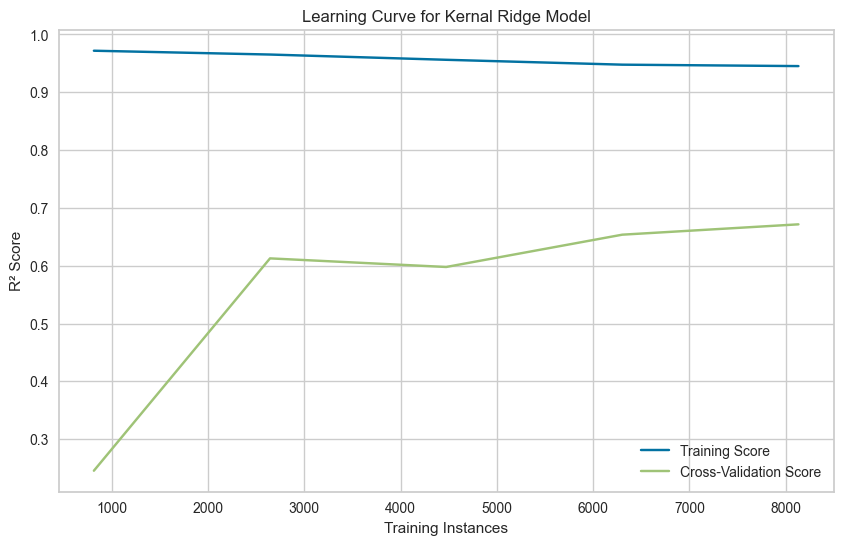

In [295]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(kr, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Instances')
plt.ylabel('R² Score')
plt.title('Learning Curve for Kernal Ridge Model')
plt.legend()
plt.show()

The learning curve above indicates that the model can improve further with more data.

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [296]:
y = df8_dummies_all_rb_scaled['market_value_in_eur']

In [297]:
y.shape

(10167,)

In [298]:
X = df8_dummies_all_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [299]:
X.shape

(10167, 370)

In [300]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05,  random_state = 42)

In [301]:
#Instantiate and fit model
kr = KernelRidge(alpha = 2.0, kernel = 'poly', degree = 3, gamma = 0.01, coef0 = 5).fit(X_train, y_train)

In [302]:
# Calculate the mean values and Standard deviation
get_cv_scores(kr)

CV Mean R²:  0.7021649768219047
CV STD:  0.06540746959672335
Mean Absolute Error (MAE):  0.5158315883000775
Mean Squared Error (MSE):  0.8687949217175983
Root Mean Squared Error (RMSE):  0.9320916916900388
R-squared (R²):  0.9417017369435318




In [303]:
# Comparing training to testing results
print(f'R² training set score: {kr.score(X_train, y_train)}')
print(f'R² testing set score: {kr.score(X_test, y_test)}')

R² training set score: 0.9417017369435318
R² testing set score: 0.3649850211962766


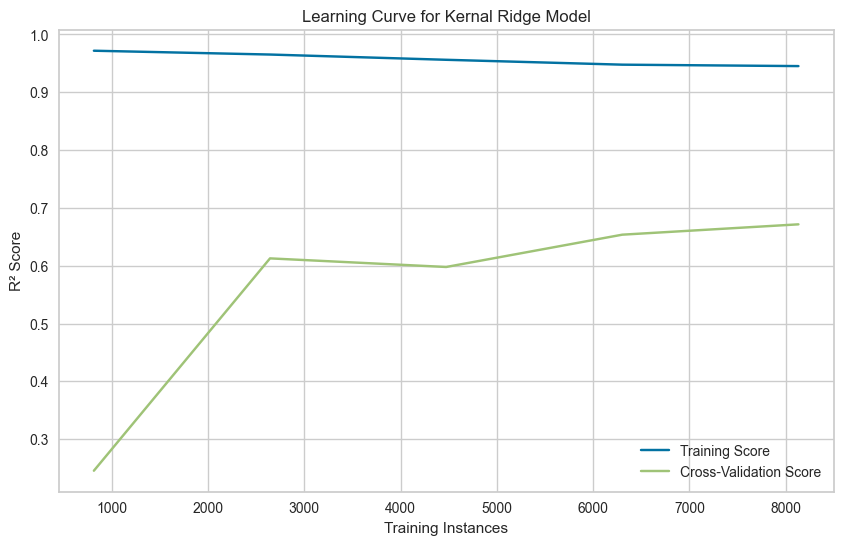

In [304]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(kr, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Instances')
plt.ylabel('R² Score')
plt.title('Learning Curve for Kernal Ridge Model')
plt.legend()
plt.show()

## Tenth Model: Random Forest Regressor on  Dummies Dataset with all features ( Robust Scaled)

In [305]:
#Instantiating Random Forest Regressor algorithm and storing it to 'forest' object
forest = RandomForestRegressor()

In [306]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [307]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.7024564862351583
CV STD:  0.0607990245313492
Mean Absolute Error (MAE):  0.28555784654687655
Mean Squared Error (MSE):  0.5899851481044242
Root Mean Squared Error (RMSE):  0.7681049069654641
R-squared (R²):  0.9604105543163141




The Random Forest Regeressor has produced the best CV Mean R² score so far at 0.71. MAE, MSE and RMSE are also promising.

In [308]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9604105543163141
R² testing set score: 0.7284881480852908


The training and test results above indicate and overfitting model.

## Eleventh Model: Random Forest Regressor on  Dummies Dataset with all features ( MinMax Scaled)

Applying Random Forest Regressor algorithm to MinMAx Scaled data as this produced a more generalised model when used on a Linear Regression model.

In [309]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [310]:
y.shape

(10167,)

In [311]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [312]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [313]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [314]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

#### <span style="color:Teal">Modelling</span>

In [315]:
#Instantiating Random Forest Regressor algorithm and storing it to 'forest' object
forest = RandomForestRegressor()

In [316]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [317]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.6964526433039154
CV STD:  0.04874000550819664
Mean Absolute Error (MAE):  0.004125603956003224
Mean Squared Error (MSE):  0.00012734996807340306
Root Mean Squared Error (RMSE):  0.011284944309716511
R-squared (R²):  0.9566303806483378




In [318]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9566303806483378
R² testing set score: 0.7300730950198877


In [319]:
# Calculate the predicted values
y_pred = forest.predict(X_test)

In [320]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.016577
6098,0.013834,0.019296
4338,0.011056,0.024007
2232,0.001611,0.002191
9798,0.066615,0.038144


The resulst are at least in the same ball park unlike previous models

### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [321]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

In [322]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [323]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.706436970096201
CV STD:  0.042542052256675914
Mean Absolute Error (MAE):  0.004005718793637898
Mean Squared Error (MSE):  0.00011658807550797291
Root Mean Squared Error (RMSE):  0.010797595820735879
R-squared (R²):  0.9597334032950553




The 90:10 train:test split produces the best results. Although we see signs of overfitting below, the MAE, MSE and RMSE are quite low indicating the lowest difference so far between actual and prediccted values. 

In [324]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9597334032950553
R² testing set score: 0.7572457452441076


The model is still overfitting to the training dataset. Overfitting is not uncommon for Random Forest models. We may need to appy pruning or early stopping or some other hyperparameter tuning to counter this.

In [325]:
# Calculate the predicted values
y_pred = forest.predict(X_test)

In [326]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.014845
6098,0.013834,0.018949
4338,0.011056,0.018673
2232,0.001611,0.001809
9798,0.066615,0.043472


### <span style="color:Teal">Split: 70% Training and 30% for Testing</span>

In [327]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [328]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [329]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9544157452262125
R² testing set score: 0.6863802369376377


### <span style="color:Teal">Hyperparameter Tuning</span>

## Twelfth Model: Gradient Boosting Regressor on  Dummies Dataset with all features ( MinMax Scaled)

In [330]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [331]:
y.shape

(10167,)

In [332]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [333]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 70% Training and 30% for Testing</span>

In [334]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [335]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor()

In [336]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [337]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8831103722950129
R² testing set score: 0.7160328616229241


In [338]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6930072609269932
CV STD:  0.053342450211993186
Mean Absolute Error (MAE):  0.009244656194786692
Mean Squared Error (MSE):  0.00033673956245177354
Root Mean Squared Error (RMSE):  0.018350464911052623
R-squared (R²):  0.8831103722950129




In [339]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [340]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.014712
6098,0.013834,0.019666
4338,0.011056,0.027511
2232,0.001611,0.007449
9798,0.066615,0.026880


### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [341]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [342]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [343]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7165554586233285
CV STD:  0.0452462401078592
Mean Absolute Error (MAE):  0.009436465086022154
Mean Squared Error (MSE):  0.00034976960156724994
Root Mean Squared Error (RMSE):  0.018702128263041348
R-squared (R²):  0.8808843479881306




In [344]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8808843479881306
R² testing set score: 0.758985682132002


In [345]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [346]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.013946
6098,0.013834,0.015789
4338,0.011056,0.028685
2232,0.001611,0.008143
9798,0.066615,0.022893


### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [347]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [348]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [349]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7193197337392733
CV STD:  0.04317371885792093
Mean Absolute Error (MAE):  0.009480686845298566
Mean Squared Error (MSE):  0.0003596097118915298
Root Mean Squared Error (RMSE):  0.01896337817720065
R-squared (R²):  0.8757998262101226




In [350]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8757998262101226
R² testing set score: 0.8037286436129731


In [351]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [352]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.013536
6098,0.013834,0.018290
4338,0.011056,0.028668
2232,0.001611,0.007151
9798,0.066615,0.023310


## Thirteenth Model: Gradient Boosting Regressor on  Dummies Dataset with all features ( Robust Scaled)

In [353]:
df8_dummies_all_rb_scaled.shape

(10167, 371)

In [354]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [355]:
y.shape

(10167,)

In [356]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [357]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [358]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [359]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [360]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7213522752382111
CV STD:  0.04275804747295755
Mean Absolute Error (MAE):  0.009480686845298566
Mean Squared Error (MSE):  0.0003596097118915298
Root Mean Squared Error (RMSE):  0.01896337817720065
R-squared (R²):  0.8757998262101226




The results from GBR on the differently scaled dataset is almost identical, unlike the previous Linear Regression Model which showed better generalisation on the MinMax Scaled data. We will continue with the Robust Scaled dataset and try to optimise the model and reduce overfitting through hyperparameter tuning.

In [361]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8757998262101226
R² testing set score: 0.8009598929061588


### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [362]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [363]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [364]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7164590264577567
CV STD:  0.04419480629262826
Mean Absolute Error (MAE):  0.009436465086022154
Mean Squared Error (MSE):  0.00034976960156724994
Root Mean Squared Error (RMSE):  0.018702128263041348
R-squared (R²):  0.8808843479881306




CV Mean R² score is slightly lower on a 80:20 train:test split but the other metrics are slightly better.

In [365]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8808843479881306
R² testing set score: 0.7634866105685825


Although still overfitting, these are the best results so far.

### <span style="color:Teal">Hyperparameter Tuning</span>

In [366]:
# define the hyperparameter space
param_distributions = {
    'n_estimators': [20, 50, 70, 100, 200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'n_iter_no_change': [1, 2, 3, 4, 5, 6],
    'validation_fraction': [0.1, 0.2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

# define the number of iterations and cross-validation folds
n_iter = 50
cv = 5

# create the random search object
random_search = RandomizedSearchCV(
    gbr,  
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    random_state=42
)


# fit the random search on the data
random_search.fit(X, y)

# print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('\nBest score:', random_search.best_score_)

Best parameters: {'validation_fraction': 0.2, 'subsample': 1.0, 'n_iter_no_change': 6, 'n_estimators': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.2}

Best score: -0.013106340619696014


## Fourteenth Model: Gradient Boosting Regressor on Dummies Dataset with all features ( MinMax Scaled) and Hyperparamaters tuned

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [367]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [368]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
# Hyperparameters based on random search CV
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 20, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [369]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=20, n_iter_no_change=6, random_state=42,
                          validation_fraction=0.2)

#### <span style="color:Teal">Evaluating the Model</span>

In [370]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6301235991806478
CV STD:  0.039417115002086514
Mean Absolute Error (MAE):  0.01042980940192397
Mean Squared Error (MSE):  0.00045863119883789004
Root Mean Squared Error (RMSE):  0.02141567647397322
R-squared (R²):  0.8438110286377849




In [371]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8438110286377849
R² testing set score: 0.7151631365581638


The results are not as expected. Both training and testing scores are worse with the model still overfitting.

#### More Hyperparameter Tuning

In [372]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [373]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [374]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.630724085599678
CV STD:  0.04025050172102392
Mean Absolute Error (MAE):  0.01042980940192397
Mean Squared Error (MSE):  0.00045863119883789004
Root Mean Squared Error (RMSE):  0.02141567647397322
R-squared (R²):  0.8438110286377849




In [375]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8438110286377849
R² testing set score: 0.7151631365581638


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [376]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'log2', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [377]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='log2',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [378]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.5418967118758344
CV STD:  0.06294736327337509
Mean Absolute Error (MAE):  0.013927098205713471
Mean Squared Error (MSE):  0.0009034663058371948
Root Mean Squared Error (RMSE):  0.03005771624453852
R-squared (R²):  0.6923203800206148




In [379]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.6923203800206148
R² testing set score: 0.5536420352960105


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [380]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [381]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [382]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.5964254420725992
CV STD:  0.053108686508661275
Mean Absolute Error (MAE):  0.010285588200730679
Mean Squared Error (MSE):  0.000435379755480581
Root Mean Squared Error (RMSE):  0.020865755569367265
R-squared (R²):  0.8517294149792876




In [383]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8517294149792876
R² testing set score: 0.6657394857752785


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [384]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 8, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [385]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=8,
                          random_state=42, validation_fraction=0.3)

In [386]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6189006876622349
CV STD:  0.035432876494979525
Mean Absolute Error (MAE):  0.01051956350928204
Mean Squared Error (MSE):  0.0005253531005549051
Root Mean Squared Error (RMSE):  0.022920582465437152
R-squared (R²):  0.8210885770842984




In [387]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8210885770842984
R² testing set score: 0.6192296041339335


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [388]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 #subsample = 1.0, 
                                 n_iter_no_change = 8, 
                                 n_estimators = 1500, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 #max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [389]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, min_samples_leaf=4,
                          min_samples_split=8, n_estimators=1500,
                          n_iter_no_change=8, random_state=42,
                          validation_fraction=0.3)

In [390]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.662672659948252
CV STD:  0.03950666912469039
Mean Absolute Error (MAE):  0.008073036006682643
Mean Squared Error (MSE):  0.0003721330767576178
Root Mean Squared Error (RMSE):  0.019290751067742744
R-squared (R²):  0.873268363303882




In [391]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.873268363303882
R² testing set score: 0.7340739246130852


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [392]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 #subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 100, 
                                 #min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 #max_features = 'sqrt', 
                                 max_depth = 5, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [393]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=5, min_samples_leaf=4,
                          n_iter_no_change=6, random_state=42,
                          validation_fraction=0.3)

In [394]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6553945768691019
CV STD:  0.05844219190281339
Mean Absolute Error (MAE):  0.009237445218941147
Mean Squared Error (MSE):  0.0004510684099275587
Root Mean Squared Error (RMSE):  0.021238371169361333
R-squared (R²):  0.8463865713037162




In [395]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8463865713037162
R² testing set score: 0.7646591120812989


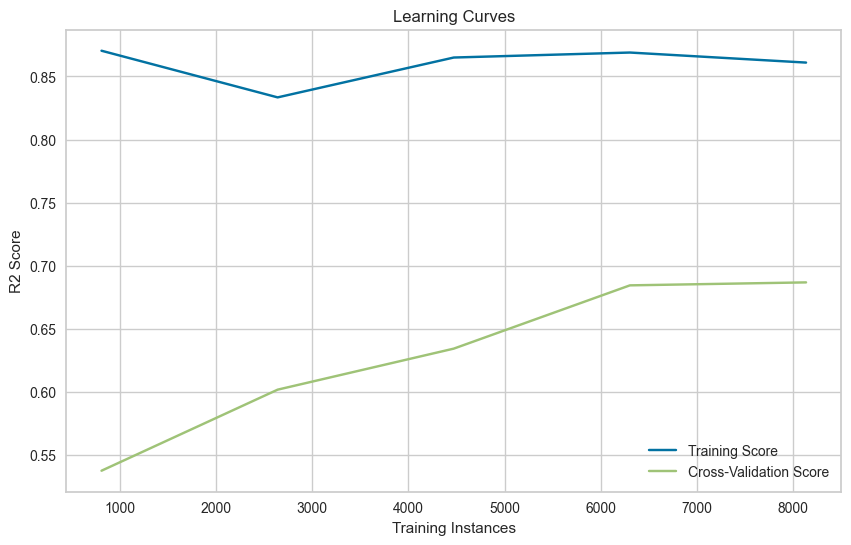

In [396]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbr, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Instances')
plt.ylabel('R2 Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

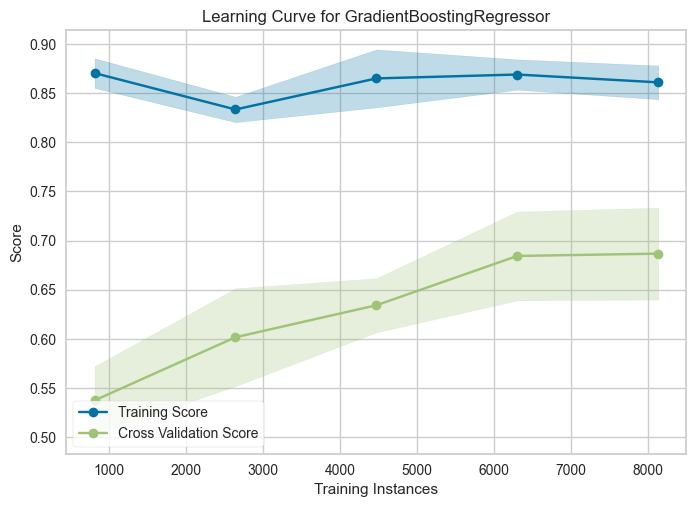

In [397]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(gbr, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show(); 

#  <span style="color:SeaGreen"> Comparing Results:</span>


# <span style="color:Tomato"> Original Results</span>

In [398]:
linear_regression_results = {
    'Model': 'Linear Regression',
    'CV Mean R²': 0.47073213209280906,
    'CV STD': 0.053393224849868914,
    'MAE': 3809591.7146170284,
    'MSE': 50217410489758.555,
    'RMSE': 7086424.379738949,
    'R²': 0.49677885162408064,
    'R² training set score': 0.49677885162408064,
    'R² testing set score': 0.37396667115895665
}


kernal_ridge_results = {
    'Model': 'Kernal Ridge',
    'CV Mean R²': 0.7040907820064072,
    'CV STD': 0.06786813709465349,
    'MAE': 0.5106171090924516,
    'MSE': 0.8730080893241261,
    'RMSE': 0.9343490190095595,
    'R²': 0.9440620144472016,
    'R² training set score': 0.9440620144472016,
    'R² testing set score': 0.9437709829637032
}

# Results for Random Forest Regressor
random_forest_results = {
    'Model': 'Random Forest Regressor',
    'CV Mean R²': 0.7156304018368109,
    'CV STD': 0.03605767081595555,
    'MAE': 0.004029437935089631,
    'MSE': 0.00011964819963889735,
    'RMSE': 0.010938381947934409,
    'R²': 0.9611574715601694,
    'R² training set score': 0.9611574715601694,
    'R² testing set score': 0.7356555852201675
}

# Results for Gradient Boosting Regressor
gradient_boosting_results = {
    'Model': 'Gradient Boosting Regressor',
    'CV Mean R²': 0.7239960005570505,
    'CV STD': 0.02787806454942855,
    'MAE': 0.009255820106858772,
    'MSE': 0.00034369507056230923,
    'RMSE': 0.018539014821783526,
    'R²': 0.8865448920312892,
    'R² training set score': 0.8865448920312892,
    'R² testing set score': 0.7552373753014826
}

# Create a DataFrame to display and compare the results
results_df = pd.DataFrame([linear_regression_results, kernal_ridge_results, random_forest_results, gradient_boosting_results])

# Display the results DataFrame
print(results_df)

                         Model  CV Mean R²    CV STD           MAE  \
0            Linear Regression    0.470732  0.053393  3.809592e+06   
1                 Kernal Ridge    0.704091  0.067868  5.106171e-01   
2      Random Forest Regressor    0.715630  0.036058  4.029438e-03   
3  Gradient Boosting Regressor    0.723996  0.027878  9.255820e-03   

            MSE          RMSE        R²  R² training set score  \
0  5.021741e+13  7.086424e+06  0.496779               0.496779   
1  8.730081e-01  9.343490e-01  0.944062               0.944062   
2  1.196482e-04  1.093838e-02  0.961157               0.961157   
3  3.436951e-04  1.853901e-02  0.886545               0.886545   

   R² testing set score  
0              0.373967  
1              0.943771  
2              0.735656  
3              0.755237  


Errors were made on the first iteration, with the Kernal Ridge model mistakenly trained on the entire dataset before being tested on the testing subset. Naturally, this data leakage results in the high R² training and testing scores. 

In [399]:
results_df.head()

,Model,CV Mean R²,CV STD,MAE,MSE,RMSE,R²,R² training set score,R² testing set score
0,Linear Regression,0.470732,0.053393,3.809592e+06,5.021741e+13,7.086424e+06,0.496779,0.496779,0.373967
1,Kernal Ridge,0.704091,0.067868,5.106171e-01,8.730081e-01,9.343490e-01,0.944062,0.944062,0.943771
2,Random Forest Regressor,0.715630,0.036058,4.029438e-03,1.196482e-04,1.093838e-02,0.961157,0.961157,0.735656
3,Gradient Boosting Regressor,0.723996,0.027878,9.255820e-03,3.436951e-04,1.853901e-02,0.886545,0.886545,0.755237


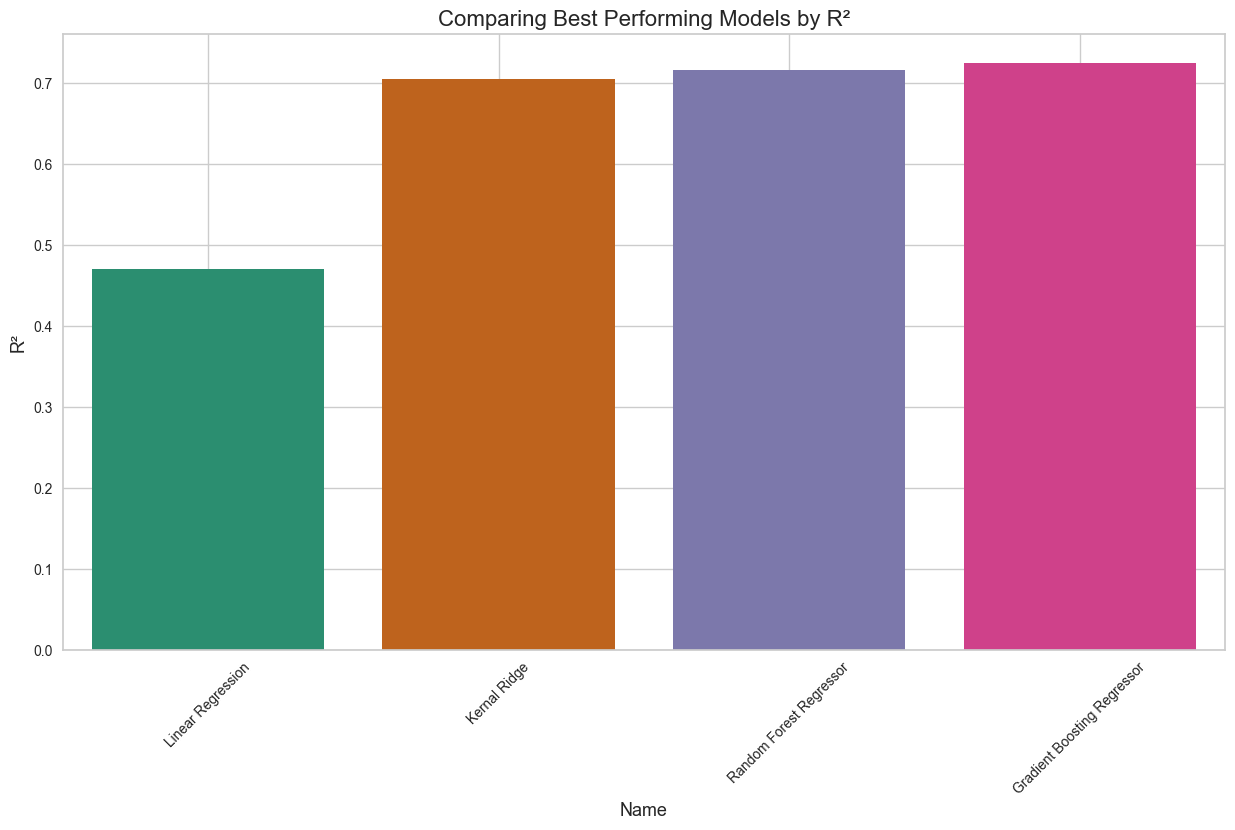

In [400]:
plt.figure(figsize=(15, 8))
sns.barplot(data = results_df, x = results_df['Model'], y = results_df['CV Mean R²'], palette = "Dark2")
plt.xlabel('Name', fontsize=13)
plt.ylabel("R²", fontsize=13)
plt.xticks(rotation = 45)
plt.title( f"Comparing Best Performing Models by R²" , fontsize=16)
plt.grid(True)
plt.show()

# <span style="color:Tomato"> Second Iteration Results</span>

In [401]:
linear_regression_results2 = {
    'Model': 'Linear Regression',
    'CV Mean R²': 0.4615535412127869,
    'CV STD': 0.04787988302732376,
    'MAE': 3742085.7849895684,
    'MSE': 48090316352442.16,
    'RMSE': 6934718.188393971,
    'R² training set score': 0.4873137482473662,
    'R² testing set score': 0.4975885582674616
}


kernal_ridge_results2 = {
    'Model': 'Kernal Ridge',
    'CV Mean R²': 0.7221912831991801,
    'CV STD': 0.02619049860596905,
    'MAE': 0.8154942850493397,
    'MSE': 2.324136967907849,
    'RMSE': 1.5245120425591427,
    'R² training set score': 0.8473025614061432,
    'R² testing set score': 0.7783620558966587
}

# Results for Random Forest Regressor
random_forest_results2 = {
    'Model': 'Random Forest Regressor',
    'CV Mean R²': 0.706436970096201,
    'CV STD': 0.042542052256675914,
    'MAE': 0.004005718793637898,
    'MSE': 0.00011658807550797291,
    'RMSE': 0.010938381947934409,
    'R² training set score': 0.9597334032950553,
    'R² testing set score': 0.7572457452441076
}

# Results for Gradient Boosting Regressor
gradient_boosting_results2 = {
    'Model': 'Gradient Boosting Regressor',
    'CV Mean R²': 0.7213522752382111,
    'CV STD': 0.04275804747295755,
    'MAE': 0.009480686845298566,
    'MSE': 0.0003596097118915298,
    'RMSE': 0.01896337817720065,
    'R² training set score': 0.8757998262101226,
    'R² testing set score': 0.8009598929061588
}

# Create a DataFrame to display and compare the results
results_df2 = pd.DataFrame([linear_regression_results2, kernal_ridge_results2, random_forest_results2, gradient_boosting_results2])

# Display the results DataFrame
print(results_df2)

                         Model  CV Mean R²    CV STD           MAE  \
0            Linear Regression    0.461554  0.047880  3.742086e+06   
1                 Kernal Ridge    0.722191  0.026190  8.154943e-01   
2      Random Forest Regressor    0.706437  0.042542  4.005719e-03   
3  Gradient Boosting Regressor    0.721352  0.042758  9.480687e-03   

            MSE          RMSE  R² training set score  R² testing set score  
0  4.809032e+13  6.934718e+06               0.487314              0.497589  
1  2.324137e+00  1.524512e+00               0.847303              0.778362  
2  1.165881e-04  1.093838e-02               0.959733              0.757246  
3  3.596097e-04  1.896338e-02               0.875800              0.800960  


In [402]:
results_df2.head()

,Model,CV Mean R²,CV STD,MAE,MSE,RMSE,R² training set score,R² testing set score
0,Linear Regression,0.461554,0.047880,3.742086e+06,4.809032e+13,6.934718e+06,0.487314,0.497589
1,Kernal Ridge,0.722191,0.026190,8.154943e-01,2.324137e+00,1.524512e+00,0.847303,0.778362
2,Random Forest Regressor,0.706437,0.042542,4.005719e-03,1.165881e-04,1.093838e-02,0.959733,0.757246
3,Gradient Boosting Regressor,0.721352,0.042758,9.480687e-03,3.596097e-04,1.896338e-02,0.875800,0.800960


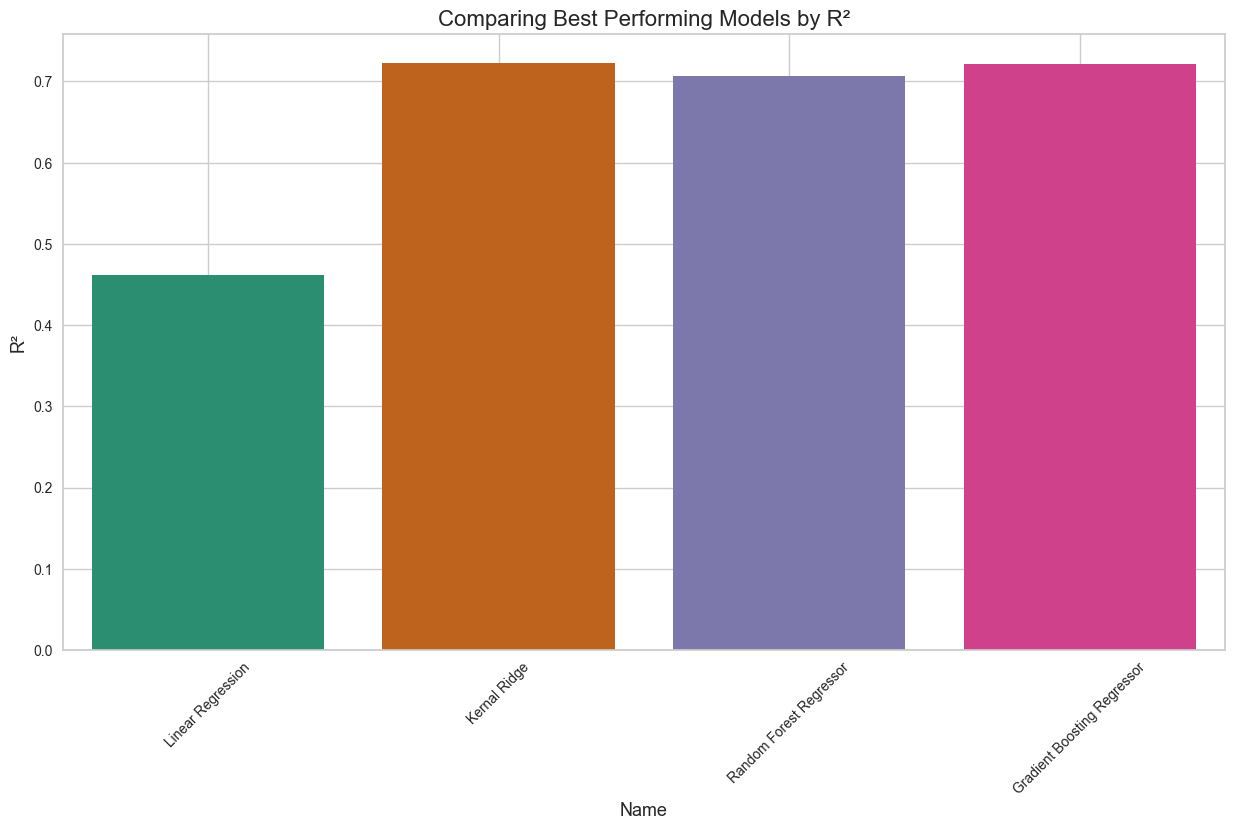

In [403]:
plt.figure(figsize=(15, 8))
sns.barplot(data = results_df2, x = results_df2['Model'], y = results_df2['CV Mean R²'], palette = "Dark2")
plt.xlabel('Name', fontsize=13)
plt.ylabel("R²", fontsize=13)
plt.xticks(rotation = 45)
plt.title( f"Comparing Best Performing Models by R²" , fontsize=16)
plt.grid(True)
plt.show()